<a href="https://colab.research.google.com/github/LiliContreras/THC_Lilibeth/blob/main/EjercicioClase_7Nov_LilibethContreras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

In [1]:
#Se importan bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
#Para que lea columnas de documento:
code='?raw=true'
#Concateno las dos variables:
url=link+code
#creo dataframe
df=pd.read_csv(url,sep=',',index_col=1)

In [3]:
df

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Guinea,482.0,287.0
2014-08-29,Nigeria,15.0,6.0
2014-08-29,Sierra Leone,935.0,380.0
2014-08-29,Liberia,322.0,225.0
2014-09-05,Guinea,604.0,362.0
...,...,...,...
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0


In [4]:
#Cuantos datos tengo:
df.shape #Sale (renglones,columnas)

(2484, 3)

In [5]:
#Información del dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 2014-08-29 to 2016-03-23
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   float64
 2   No. of confirmed deaths  1648 non-null   float64
dtypes: float64(2), object(1)
memory usage: 142.2+ KB


In [6]:
#Para ver primeros elementos de la lista:
df.head()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Guinea,482.0,287.0
2014-08-29,Nigeria,15.0,6.0
2014-08-29,Sierra Leone,935.0,380.0
2014-08-29,Liberia,322.0,225.0
2014-09-05,Guinea,604.0,362.0


In [9]:
#Para imprimir ´'ultimos datos del dataframe:
df.tail()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0
2016-03-23,Nigeria,19.0,7.0
2016-03-23,United States of America,4.0,1.0


In [10]:
#Ver cuantos datos nulos tengo:
df.isnull()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,False,False,False
2014-08-29,False,False,False
2014-08-29,False,False,False
2014-08-29,False,False,False
2014-09-05,False,False,False
...,...,...,...
2016-03-23,False,False,True
2016-03-23,False,False,True
2016-03-23,False,False,False


In [11]:
#Muestra ya la suma de los datos faltantes y en que columna se encuentran
df.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
dtype: int64

In [14]:
#México está en la base de datos?
df['Country'].isin(['Mexico']).sum()

0

In [16]:
#Seleccionar subbase:
'''
Pasos:
 1-  Máscara booleana: df['Country']=='Sierra Leone'
      Marca el renglón que corresponde al país Sierra Leone
 2- df[df['Country']=='Sierra Leone']
      Asigna ese renglón del dataframe a la variable SL
'''
SL=df[df['Country']=='Sierra Leone']

In [17]:
#Aquí edito la variable para quitar la columna de Country
SL=SL.drop('Country',axis=1)

In [18]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,461.0
2014-09-12,1287.0,478.0
2014-09-16,1464.0,514.0


In [20]:
SL.shape

(259, 2)

In [22]:
SL.isnull().sum() #Salen dos datos nulos, se debe decidir que hacer con esos datos

No. of confirmed cases     0
No. of confirmed deaths    2
dtype: int64

In [23]:
#Quiero que rellene esos datos nulos con algo: (en este caso le pongo cero)
SL.fillna(0.0,inplace=True)

In [24]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    0
dtype: int64

In [25]:
#Promedio de muertes estimadas:
SL['No. of confirmed deaths'].mean()

3081.019305019305

In [26]:
SL['No. of confirmed cases'].mean()

7883.671814671815

In [36]:
#Selecciono fechas:
Dates=SL.index[0:-1:10] #del primero al último y de 10 en 10
NCC=SL['No. of confirmed cases'][0:-1:10] #Casos confirmados
NCD=SL['No. of confirmed deaths'][0:-1:10] #Decesos

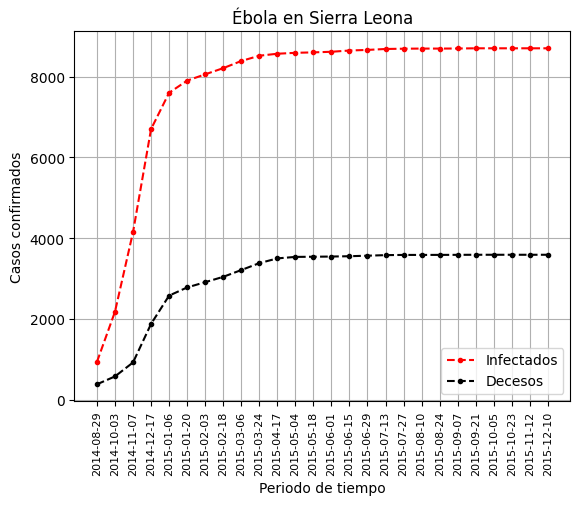

In [37]:
plt.plot(Dates,NCC,'o--r',ms=3,label='Infectados')
plt.plot(Dates,NCD,'o--k',ms=3,label='Decesos')
plt.grid()
plt.title('Ébola en Sierra Leona')
plt.ylabel('Casos confirmados')
plt.xlabel('Periodo de tiempo')
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.show()

In [38]:
#Calculo de porcentaje:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']

In [39]:
#aGREGAR ESO AL DATAFRAME:
SL['PIvsD']=PIvsD

In [43]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,PIvsD,Recuperados
Date,,,,
2014-08-29,935.0,380.0,40.641711,555.0
2014-09-05,1146.0,443.0,38.656195,703.0
2014-09-08,1234.0,461.0,37.358185,773.0
2014-09-12,1287.0,478.0,37.140637,809.0
2014-09-16,1464.0,514.0,35.109290,950.0


In [42]:
#Porcentaje rcuperados:
recuperados=((100-PIvsD)/100)*SL['No. of confirmed cases']
SL['Recuperados']=recuperados